#### 1.
* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$

In [1]:
import numpy as np
import pandas as pd
from scipy import linalg as alg
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
%precision 4
np.set_printoptions(suppress=True)

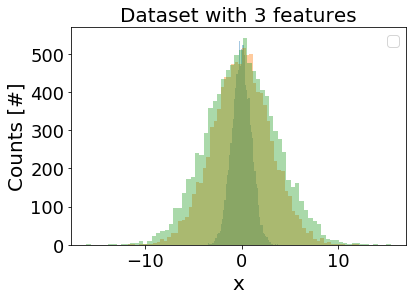

In [2]:
N=10000
mu1,sigma1,mu2,sigma2=0,1,0,3
np.random.seed(9201)
array1,array2= np.random.normal( mu1, sigma1, N),np.random.normal( mu2, sigma2, N)
array3= 2*array1+array2
datamatrix = pd.DataFrame({'array1' : array1,'array2' : array2,'array3' : array3,})
cov_matrix=np.cov(datamatrix,rowvar=False)
plt.hist(datamatrix["array1"], bins='auto',alpha=0.4) 
plt.hist(datamatrix["array2"], bins='auto',alpha=0.4) 
plt.hist(datamatrix["array3"], bins='auto',alpha=0.4) 
plt.tick_params(labelsize=18)
plt.title("Dataset with 3 features",fontsize=20)
plt.ylabel("Counts [#]",fontsize=20)
plt.xlabel("x",fontsize=20)
plt.legend(fontsize=15,loc="best")
plt.show()

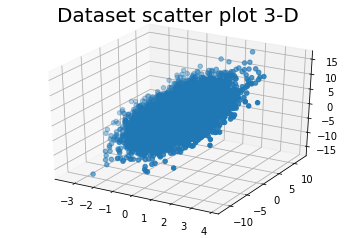

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Dataset scatter plot 3-D",fontsize=20)
ax.scatter(datamatrix["array1"], datamatrix["array2"], datamatrix["array3"])

#### 2. 
 Find the eigenvectors and eigenvalues of the covariance matrix of the dataset

In [4]:
l0, V0 = alg.eig(cov_matrix)
print "Eigenvalues eigendecomposition : \n", l0, "\n"
print "Eigenvectors eigendecomposition : "
for i1 in range(len(l0)):
    print V0[:,i1]

Eigenvalues eigendecomposition : 
[20.2408+0.j  0.    +0.j  2.6168+0.j] 

Eigenvectors eigendecomposition : 
[-0.0825 -0.6174 -0.7823]
[-0.8165 -0.4082  0.4082]
[ 0.5714 -0.6725  0.4704]


<font color='green'>
     
(Eigenvectors are such that the column $v[:,i]$ is the eigenvector corresponding to the eigenvalue $w[i]$, as you can check [here](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.linalg.eig.html)).
    
</font>

#### 3.
Find the eigenvectors and eigenvalues using SVD. Check that they are two procedure yields to same result.

In [5]:
U, D, Vt = alg.svd(datamatrix)
l_svd = D**2/(N-1)
print "Eigenvalues with SVD: ","\n",l_svd
print "Eigenvectors with SVD:"
for i1 in range(len(l_svd)):
    print Vt[i1,:]

Eigenvalues with SVD:  
[20.2408  2.6171  0.    ]
Eigenvectors with SVD:
[-0.0825 -0.6174 -0.7823]
[ 0.5714 -0.6724  0.4704]
[ 0.8165  0.4082 -0.4082]


<font color='green'>
     
The eigenvalues are equal, unless differences due to the precision in the representation for small numbers. 

The reason why this is true is algebraic. <br>
Being the covariance matrix a [normal matrix](https://en.wikipedia.org/wiki/Normal_matrix): 

$ A A^* = A^* A \longrightarrow A^T=A$ 

<br>
The non-zero elements of D are the square roots of the non-zero eigenvalues of $A^2$, so they are the non-zero eigenvalues of $A$.

</font>

#### 4.
What percent of the total variability is explained by the principal components? <br> 
Given how the dataset was constructed, do these make sense? <br> 

<font color='green'>
    
In our data matrix we have 3 variables that correspond to three dimensions. <br> Since the third column of the data matrix is a linear combination of the previous ones:

\begin{equation*}
rank(DataMatrix)=2
\end{equation*}

The space of the observed data has  2 dimensions so two vectors are needed to generate it.  If we consider all three eigenvectors (also the one relative to the null eigenvalue) we will have a [span](https://en.wikipedia.org/wiki/Linear_span), not a base of the space of the observed data.

</font>

Reduce the dimensionality of the system so that at least 99% of the total variability is retained.

In [6]:
tempsum,i=0,0
limit=99
print "% Total Variability explained by the principal components : "
while tempsum<limit:
    tempsum = tempsum+D[i]/D.sum()*100
    print i, ":", round(D[i]/D.sum()*100,3),"%"
    if tempsum<limit: 
        i=i+1
print "Consider the first",i+1, "eigenvalues"

% Total Variability explained by the principal components : 
0 : 73.552 %
1 : 26.448 %
Consider the first 2 eigenvalues


#### 5-6.
* Redefine the data in the basis yielded by the PCA procedure.
* Plot the data points in the original and the new coordiantes as a set of scatter plots. <br>Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.

/home/guida/anaconda2/lib/python2.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5,1,'Reduced Rotated Data, Two Principals Components')

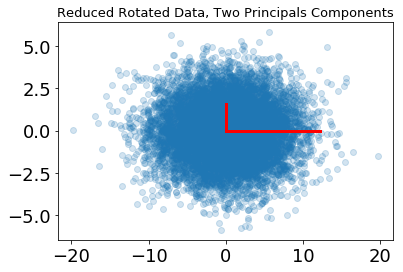

In [7]:
rotated_data = np.dot(Vt,datamatrix.T)
reduced_data=np.delete(rotated_data,2,axis=0)
cov_matrix1=np.cov(reduced_data,rowvar=True)
l1, V1 = alg.eig(cov_matrix1)
plt.scatter(rotated_data[0,:], rotated_data[1,:], alpha=0.2)
scale_factor=0.6
for li, vi in zip(l1, np.diag([1]*3)):
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=3)
plt.tick_params(labelsize=18)        
plt.title("Reduced Rotated Data, Two Principals Components",fontsize=13)    

Text(0.5,1,'Principal components: 2 vs 1')

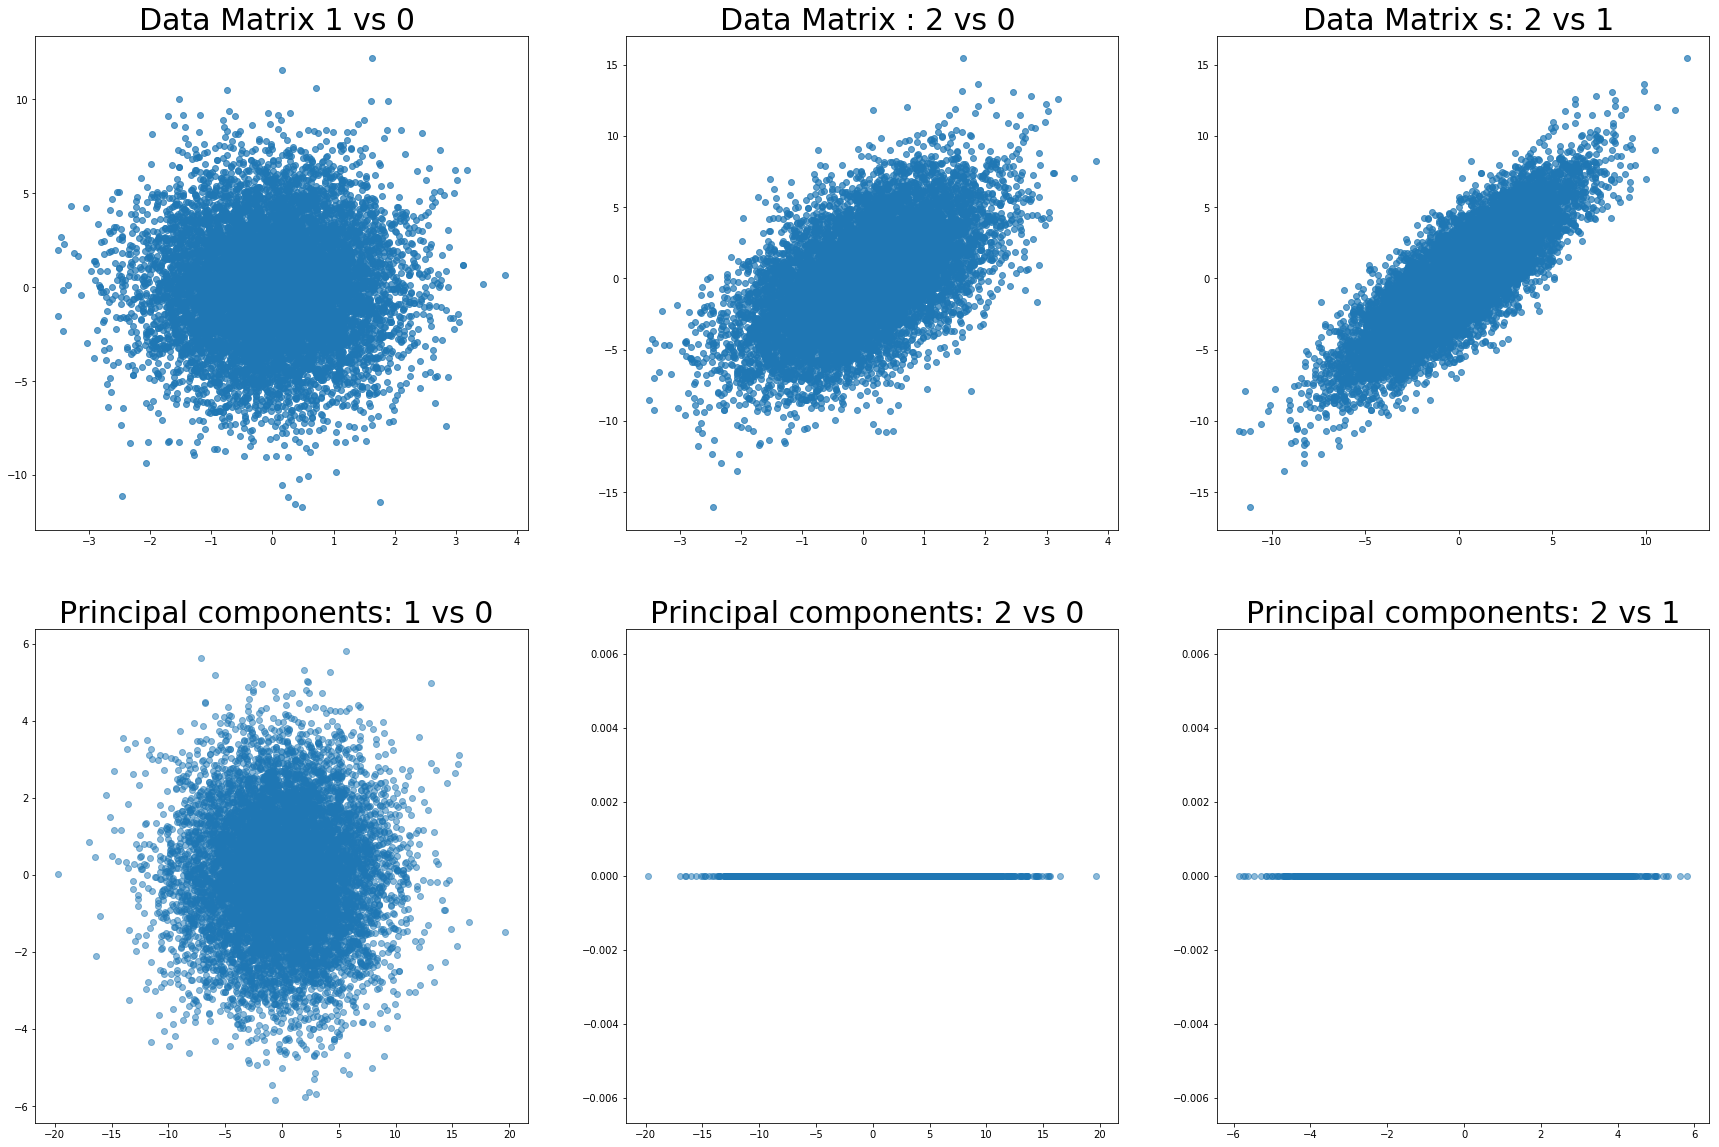

In [8]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(30, 20))
axs[0,0].scatter(datamatrix.iloc[:,0],datamatrix.iloc[:,1],alpha=0.7,label='set')
axs[0,0].set_title("Data Matrix 1 vs 0 ",fontsize=30)
axs[0,1].scatter(datamatrix.iloc[:,0],datamatrix.iloc[:,2],alpha=0.7,label='set')
axs[0,1].set_title("Data Matrix : 2 vs 0 ",fontsize=30)
axs[0,2].scatter(datamatrix.iloc[:,1],datamatrix.iloc[:,2],alpha=0.7,label='set') 
axs[0,2].set_title("Data Matrix s: 2 vs 1 ",fontsize=30)
axs[1,0].scatter(rotated_data[0,:],rotated_data[1,:],alpha=0.5,label='set')
axs[1,0].set_title("Principal components: 1 vs 0 ",fontsize=30)
axs[1,1].scatter(rotated_data[0,:],rotated_data[2,:],alpha=0.5,label='set')
axs[1,1].set_title("Principal components: 2 vs 0 ",fontsize=30)
axs[1,2].scatter(rotated_data[1,:],rotated_data[2,:],alpha=0.5,label='set') 
axs[1,2].set_title("Principal components: 2 vs 1",fontsize=30)

<font color='green'>
Principal components: 1 vs 0 $\longrightarrow$ Is the rapresentation of the data in the eigenspaces spanned by $v_0$ and $v_1$ 

Principal components: 2 vs 0 $\longrightarrow$ Is the rapresentation of the data in the eigenspaces spanned by $v_0$ and $v_2$ 

Principal components: 2 vs 1$\longrightarrow$ Is the rapresentation of the data in the eigenspaces spanned by $v_1$ and $v_2$ 


Indexing of the eigenvectors is based on the percentage of total variability that is explained in the direction they have identified.
</font>    

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise.  <br> Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [9]:
datamatrix1=datamatrix

In [10]:
for j in range(10):
    temp_column = np.random.normal(0,np.random.uniform(0.015,0.025),N)
    datamatrix1 = np.column_stack((datamatrix1, temp_column))
datamatrix1.shape

(10000, 13)

In [11]:
cov_matrix1=np.cov(datamatrix1,rowvar=False)
l01, V01 = alg.eig(cov_matrix1)
# print "Eigenvalues : \n", l01, "\n"
# print "Eigenvectors : ","\n", V01, "\n"
U1, D1, Vt1 = alg.svd(cov_matrix1)
# print "Eigenvalues with SVD: ","\n",D1
# print "Eigenvectors with SVD (rows): ","\n", Vt1
# print "Eigenvectors with SVD: (columns) ","\n", U1
tempsum1,i1=0,0
limit1=99
print "% Total Variability explained by the principal components : "
while tempsum1<limit1:
    tempsum1 = tempsum1+D1[i1]/D1.sum()*100
    print i1, ":", round(D1[i1]/D1.sum()*100,3),"%"
    if tempsum1<limit1: 
        i1=i1+1
print "Consider the first",i1+1, "eigenvalues"

% Total Variability explained by the principal components : 
0 : 88.537 %
1 : 11.447 %
Consider the first 2 eigenvalues


Text(0.5,1,'Reduced Rotated Data, Two Principals Components')

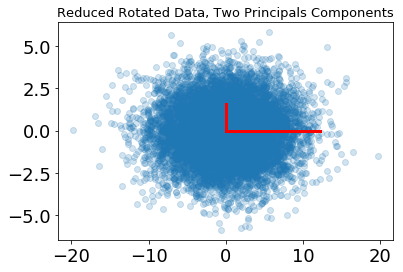

In [12]:
rotated_data1 = np.dot(datamatrix1, U1)
reduced_data1=np.delete(rotated_data1,np.s_[2:],1)
cov_matrix1=np.cov(rotated_data1,rowvar=False)
l1, V1 = alg.eig(cov_matrix1)
plt.scatter(reduced_data1[:,0], reduced_data1[:,1], alpha=0.2)
scale_factor=0.6
for li1, vi1 in zip(l1, np.diag([1]*3)):
    plt.plot([0, scale_factor*li1*vi1[0]], [0, scale_factor*li1*vi1[1]], 'r-', lw=3)
plt.tick_params(labelsize=18)        
plt.title("Reduced Rotated Data, Two Principals Components",fontsize=13)   

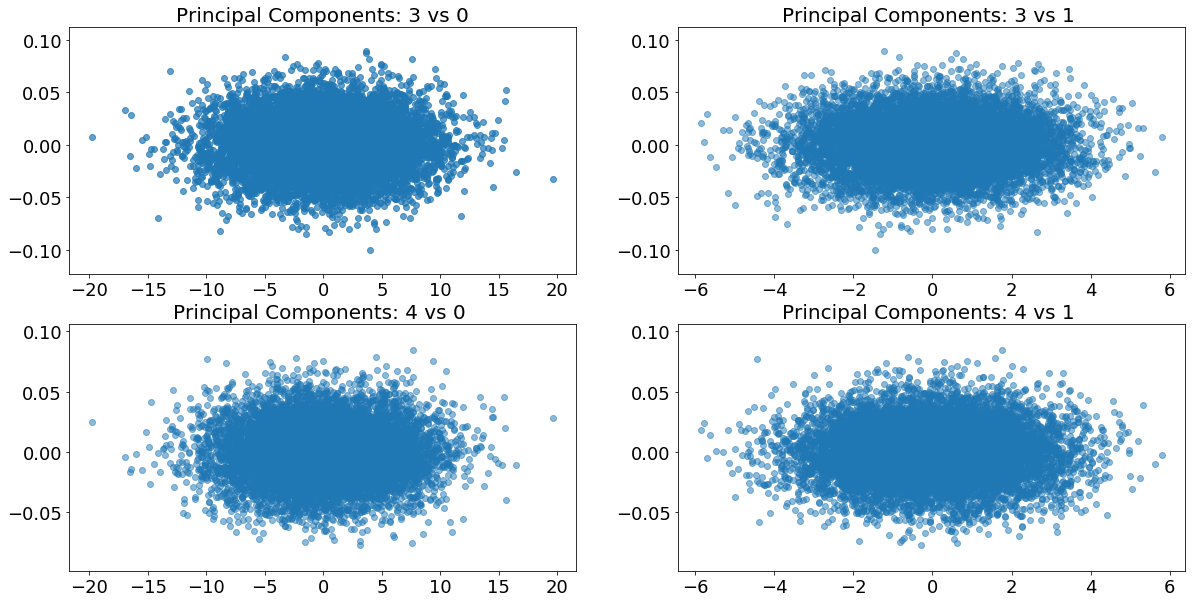

In [13]:
fig, axs1 = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axs1[0,0].scatter(rotated_data1[:,0],rotated_data1[:,2],alpha=0.7,label='set') 
axs1[0,0].set_title("Principal Components: 3 vs 0",fontsize=20)
axs1[0,0].tick_params(labelsize=18)  
axs1[0,1].scatter(rotated_data1[:,1],rotated_data1[:,2],alpha=0.5,label='set')
axs1[0,1].set_title("Principal Components: 3 vs 1 ",fontsize=20)
axs1[0,1].tick_params(labelsize=18)  
axs1[1,0].scatter(rotated_data1[:,0],rotated_data1[:,3],alpha=0.5,label='set')
axs1[1,0].set_title("Principal Components: 4 vs 0 ",fontsize=20)
axs1[1,0].tick_params(labelsize=18)  
axs1[1,1].scatter(rotated_data1[:,1],rotated_data1[:,3],alpha=0.5,label='set')
axs1[1,1].set_title("Principal Components: 4 vs 1 ",fontsize=20)
axs1[1,1].tick_params(labelsize=18)    

<font color='green'>
Graph 1 vs 0 has not been proposed again, because the result would be the same as in the previous exercise. <br>
As you can see, the components after the first two do not make a significant contribution. 
To understand this, just look at the range of variability on the y axis. <br>
The scatter plot shape is determined by the fact that the data according to the Gaussian distribution.<br>
Only a few projections have been plotted because the others would be too many and all the same.
</font>    

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. <br> 
Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. <br> Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.

<hr style="height:1px;border:none;color:#333;background-color:#333;" />
<font color='green'>
From the classical dynamics it is know that to describe the motion of a spring we need 2 variables, the time and the spatial one along which the spring moves. <br>
To perform a principal component analysis it is necessary to generate data knowing this law.  
After doing that they are put in the Datamatrix as if the law of the motion was not known. 
As last the time is added to the Datamatrix.   
    
\[
Datamatrix = \begin{bmatrix} 
    x_{A0} & x_{A1} & \dots & x_{A1000} \\
    y_{A0} & a_{12} & \dots \\
    x_{B0} & a_{12} & \dots \\
    \vdots & & \ddots & \\
    t_0 &   & &    t_{1000}
    \end{bmatrix}
\]    

Now the Perform a Principal Component Analysis is performed on the Datamatrix.
</font>    

In [14]:
measures = 1000
w=2*np.pi/(100)
t=np.linspace(0,100,measures)
phi=np.pi/2
a=50
np.random.seed(9131)
position_x= a*np.sin(w*t+phi)

In [15]:
position_y= np.random.normal(0,2, measures)
cameras=10
data=np.empty((2*cameras,measures))
theta=(np.random.randint(120, size=cameras)-60)*(np.pi/180)
phi=(np.random.randint(90, size=50)-60)*np.pi/180
# # deflected_camera_x =[position_x[i]*np.sin(theta[0,x]) for i in range(2000) for x in range(20)] 
for x in range(cameras):
    for i in range(measures):
        data[2*x,i] = position_x[i]*np.sin(theta[x])
        data[2*x+1,i] = position_y[i]*np.cos(phi[x])
data = np.vstack([data,t])
datamatrix=pd.DataFrame(data)
datamatrix

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,9.540450,9.540261,9.539695,9.538752,9.537431,9.535733,9.533657,9.531205,9.528376,9.525169,...,9.525169,9.528376,9.531205,9.533657,9.535733,9.537431,9.538752,9.539695,9.540261,9.540450
1,0.404933,-0.674189,-2.207955,-3.354680,0.025952,-0.528686,-1.024558,-1.961551,0.346427,-0.605803,...,1.377015,-0.714019,-1.375416,-1.368182,0.165364,1.304086,0.111807,-3.114110,-0.864342,1.139625
2,4.357787,4.357701,4.357442,4.357011,4.356408,4.355633,4.354685,4.353564,4.352272,4.350807,...,4.350807,4.352272,4.353564,4.354685,4.355633,4.356408,4.357011,4.357442,4.357701,4.357787
3,0.433479,-0.721716,-2.363605,-3.591169,0.027782,-0.565956,-1.096784,-2.099831,0.370849,-0.648509,...,1.474088,-0.764354,-1.472376,-1.464632,0.177021,1.396018,0.119688,-3.333640,-0.925274,1.219963
4,6.958655,6.958517,6.958105,6.957416,6.956453,6.955214,6.953701,6.951912,6.949848,6.947510,...,6.947510,6.949848,6.951912,6.953701,6.955214,6.956453,6.957416,6.958105,6.958517,6.958655
5,0.436469,-0.726693,-2.379905,-3.615934,0.027973,-0.569859,-1.104348,-2.114312,0.373406,-0.652981,...,1.484254,-0.769625,-1.482530,-1.474733,0.178242,1.405645,0.120514,-3.356629,-0.931655,1.228376
6,-27.231952,-27.231413,-27.229797,-27.227104,-27.223334,-27.218488,-27.212564,-27.205564,-27.197488,-27.188336,...,-27.188336,-27.197488,-27.205564,-27.212564,-27.218488,-27.223334,-27.227104,-27.229797,-27.231413,-27.231952
7,0.268881,-0.447670,-1.466109,-2.227548,0.017233,-0.351054,-0.680319,-1.302494,0.230032,-0.402260,...,0.914355,-0.474118,-0.913293,-0.908489,0.109804,0.865929,0.074241,-2.067807,-0.573934,0.756725
8,-2.616798,-2.616746,-2.616591,-2.616332,-2.615970,-2.615504,-2.614935,-2.614262,-2.613486,-2.612607,...,-2.612607,-2.613486,-2.614262,-2.614935,-2.615504,-2.615970,-2.616332,-2.616591,-2.616746,-2.616798
9,0.237863,-0.396027,-1.296979,-1.970579,0.015245,-0.310557,-0.601838,-1.152239,0.203496,-0.355856,...,0.808875,-0.419424,-0.807936,-0.803686,0.097137,0.766036,0.065676,-1.829266,-0.507725,0.669429


In [16]:
cov_matrix3=np.cov(data,rowvar=True)
l1, V1 = np.linalg.eig(cov_matrix3)
U3, D3, Vt3 = alg.svd(cov_matrix3)
print V1.shape
# print "\n","Eigenvalues x data with SVD: ","\n",D3,"\n"
# print "Eigenvectors x data with SVD: "
# for i3 in range(len(l1)):
#     print U3[:,i3]
# print "\n","\n"
# for i2 in range(len(l1)):
#     print Vt2[i2,:]
tempsum1,i1=0,0
limit1=99
print "% Total Variability explained by the principal components : "
while tempsum1<limit1:
    tempsum1 = tempsum1+D3[i1]/D3.sum()*100
    print i1, ":", round(D3[i1]/D3.sum()*100,3),"%"
    if tempsum1<limit1: 
        i1=i1+1
print "\n Consider the first",i1+1, "eigenvalues to preserve 99% of the information for the dataset."
print "\n In this case the third principal component explain just", round(D3[2]/D3.sum()*100,3),"%" ," of the information. "

(21, 21)
% Total Variability explained by the principal components : 
0 : 77.988 %
1 : 21.286 %

 Consider the first 2 eigenvalues to preserve 99% of the information for the dataset.

 In this case the third principal component explain just 0.726 %  of the information. 


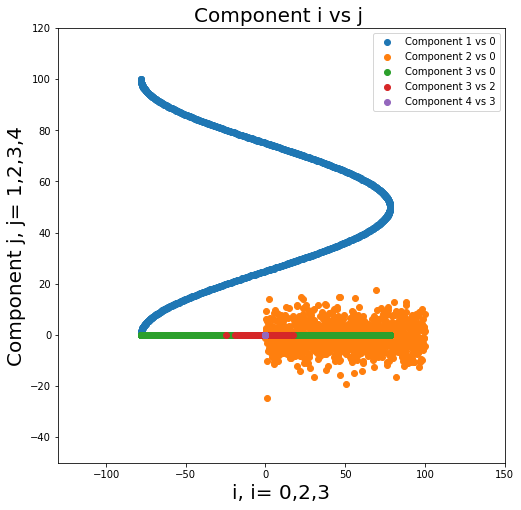

In [17]:
rotated_data3 = np.dot(Vt3,data)
fig, ax = plt.subplots(figsize=[8,8])
ax.set_ylim(-50,120)
ax.set_xlim(-130,150)
ax.scatter(rotated_data3[0,:], rotated_data3[1,:], alpha=1,label='Component 1 vs 0')
ax.scatter(rotated_data3[1,:], rotated_data3[2,:], alpha=1,label='Component 2 vs 0')
ax.scatter(rotated_data3[0,:], rotated_data3[3,:], alpha=1,label='Component 3 vs 0')
ax.scatter(rotated_data3[2,:], rotated_data3[3,:], alpha=1,label='Component 3 vs 2')
ax.scatter(rotated_data3[3,:], rotated_data3[4,:], alpha=1,label='Component 4 vs 3')
plt.title("Component i vs j ",fontsize=20)
plt.ylabel("Component j, j= 1,2,3,4",fontsize=20)
plt.xlabel("i, i= 0,2,3",fontsize=20)
ax.legend()

<font color='green'>
The previous plot may be unclear but it allows us to see that the PCA has been successful. <br>
Knowing the result that should have come  we recognize the simple harmonic motion (blue) and and noise as a function of time (orange). 
    
As a convention it was decided to put on the x axis the eigenvector relative to the most significant eigenvalue of the two. 
</font>    

4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [18]:
datamatrix5 = pd.read_csv('~/copiadacancellare1/magic04.data', names=['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','fCategory'])
datamatrix5.loc[datamatrix5['fCategory'] =='g', 'fCategory'] = 0
datamatrix5.loc[datamatrix5['fCategory'] =='h', 'fCategory'] = 1
datamatrix5

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,fCategory
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,0
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,0
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,0
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,0
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,0
5,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,0
6,48.2468,17.3565,3.0332,0.2529,0.1515,8.5730,38.0957,10.5868,4.7920,219.0870,0
7,26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.4560,-2.9292,0.8120,237.1340,0
8,96.2327,46.5165,4.1540,0.0779,0.0390,110.3550,85.0486,43.1844,4.8540,248.2260,0
9,46.7619,15.1993,2.5786,0.3377,0.1913,24.7548,43.8771,-6.6812,7.8750,102.2510,0


In [19]:
datamatrix5=datamatrix5.T
covariance_matrix5=np.cov(datamatrix5) 
l,V = np.linalg.eig(covariance_matrix5)
U5, D5, Vt5 = alg.svd(datamatrix5,full_matrices=False)
tempsum4=0
limit4=99
i1=0
print "% Total Variability explained by the principal components : "
while tempsum4<limit4:
    tempsum4 = tempsum4+D5[i1]/D5.sum()*100
    print i1, ":", round(D5[i1]/D5.sum()*100,3),"%"
    if tempsum4<limit4: 
        i1=i1+1
print "\n Consider the first",i1+1, "eigenvalues to preserve 99% of the information for MAGIC dataset. \n"

% Total Variability explained by the principal components : 
0 : 51.145 %
1 : 15.167 %
2 : 10.687 %
3 : 8.564 %
4 : 6.709 %
5 : 4.875 %
6 : 2.536 %

 Consider the first 7 eigenvalues to preserve 99% of the information for MAGIC dataset. 

